#Step 1 : Initializing libraries and the Dataset

Step 1.1 : Libraries are imported

In [1]:
import pandas as pd #For data manipulation and analysis
import numpy as np  #For numerical computing
import time #For measuring training time
import matplotlib.pyplot as plt #For creating plots
from IPython.display import display # For displaying dataframes
from sklearn.model_selection import train_test_split, cross_val_score #For splitting the dataset into training and test sets, and performing cross-validation
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #For scaling features and encoding categorical variables
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay #For evaluating model performance



---



Step 1.2 : Loading the dataset

In [2]:
traffic_data = pd.read_excel("TrafficSituation.xlsx")



---



Step 1.3 : Selecting Features and the Label

In [3]:
features = ['Time in Hours', 'CarCount', 'BusCount', 'TruckCount', 'Day of the week', 'Weather']
target = 'Traffic Situation'

X = traffic_data[features]
y = traffic_data[target]

print(traffic_data.head(10))

  Time in Hours Day of the week  CarCount  BusCount  TruckCount Weather  \
0   06:00:00 AM         Tuesday       129        42           1   Rainy   
1   01:15:00 PM       Wednesday       104        25          20   Clear   
2   12:45:00 AM          Sunday        16         1          23   Snowy   
3   03:30:00 PM        Saturday        83         7          17  Cloudy   
4   01:00:00 PM          Friday       127         9           7   Rainy   
5   10:15:00 PM       Wednesday        14         0          24  Cloudy   
6   02:15:00 AM       Wednesday        16         0          37  Cloudy   
7   07:00:00 PM        Saturday       108         6          21   Clear   
8   10:45:00 AM         Tuesday        34         9          35   Clear   
9   10:00:00 AM       Wednesday        58         7          16   Clear   

  Traffic Situation  
0         Congested  
1             Clear  
2    Less Congested  
3    Less Congested  
4         Congested  
5    Less Congested  
6    Less Congested 



---



---



#Step 2 : Data Preprocessing

Step 2.1 : Handling missing data



*   No missing data handling was done since dataset does not have any missing data





---



Step 2.2 : Normalization of numeric features

*   Scaling numerical features (Time in Hours, CarCount, BusCount, TruckCount) to a range of [0, 1] using MinMaxScaler.
*   Converting Time in Hours to a floating point so its easily useable by the algorithms.



In [4]:
traffic_data['Time in Hours'] = traffic_data['Time in Hours'].apply(
    lambda x: pd.to_datetime(x, format='%I:%M:%S %p').hour + pd.to_datetime(x, format='%I:%M:%S %p').minute / 60
)

print(traffic_data[['Time in Hours']].head(10))

   Time in Hours
0           6.00
1          13.25
2           0.75
3          15.50
4          13.00
5          22.25
6           2.25
7          19.00
8          10.75
9          10.00


In [5]:
scaler = MinMaxScaler()
traffic_data[['Time in Hours', 'CarCount', 'BusCount', 'TruckCount']] = scaler.fit_transform(traffic_data[['Time in Hours', 'CarCount', 'BusCount', 'TruckCount']])



---



Step 2.3 : Encoding categorical features

In [6]:
label_encoder = LabelEncoder()
traffic_data['Day of the week'] = label_encoder.fit_transform(traffic_data['Day of the week'])
traffic_data['Weather'] = label_encoder.fit_transform(traffic_data['Weather'])
traffic_data['Traffic Situation'] = label_encoder.fit_transform(traffic_data['Traffic Situation'])




---



Step 2.4 : Splitting the Dataset into training and testing subdatasets

In [7]:
X = traffic_data.drop('Traffic Situation', axis=1)
y = traffic_data['Traffic Situation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.head(10))

      Time in Hours  Day of the week  CarCount  BusCount  TruckCount  Weather
1647       0.989474                6  0.074286      0.02    0.482759        2
3860       0.852632                1  0.291429      0.24    0.155172        1
2458       0.736842                2  0.548571      0.42    0.155172        0
1729       0.084211                3  0.017143      0.04    0.620690        3
226        0.536842                4  0.171429      0.30    0.431034        0
3875       0.052632                3  0.034286      0.02    0.534483        0
535        0.326316                1  0.828571      0.76    0.051724        1
1532       0.568421                4  0.462857      0.18    0.517241        1
3249       0.968421                1  0.074286      0.00    0.189655        0
3543       0.526316                3  0.154286      0.16    0.431034        1




---



**Here is a pie chart to show the distribution of labels in the dataset**

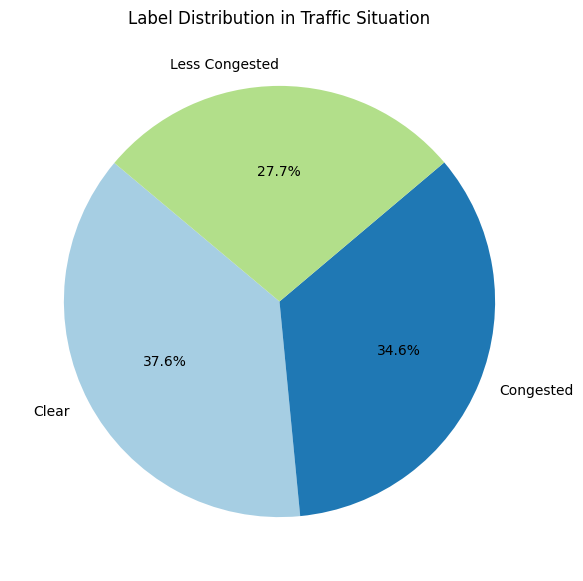

In [8]:
label_counts = pd.Series(y).value_counts()
label_names = label_encoder.classes_

plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=label_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Label Distribution in Traffic Situation")

plt.show()




---



---



#Step 3 : Training The Models

Step 3.1 : Deciding models to use

Here I used these algorithms because:

*  **Random Forest :** A robust classification algorithm that utilises multiple decision trees which can work with non-prepocessed data. My dataset includes categorical values like Weather, Day of the Week, Traffic Situation, so its perfect for this dataset.

* **Decision Tree :** Similar to Random forest but more prone to overfitting. I choose this to see the difference in performance between Random forest and Decision tree. Also to see if the decision tree will overfit or not.

*   **Logistic Regression :** A parametric Classsification algorithm which assumes that the data fits to a sigmoid function. Mainly for binary classification. I used it because I wanted to see how a parametric algorithm would perform for my problem.

*   **K-Nearest Neighbors :** It’s a simple, intuitive algorithm that can be used to evaluate how non-parametric models handle traffic prediction. It’s also effective when the data is not linearly separable, as the decision boundary is based on the local distribution of data points.

*   **Support Vector Machine :** SVM is great for high-dimensional spaces and is effective in cases where the decision boundary is not easily separable. By using RBF, we are allowing the SVM model to find a more flexible decision boundary.




---



Step 3.2 : Training and Evaluating the models

In [9]:
results = [] #Test results are kept here

#Training and evaluating KNN


In [10]:
# Model 1: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
training_time = end_time - start_time

results.append({
    "Model": "K-Nearest Neighbors",
    "Training Time (seconds)": training_time,
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted')
})



---





#Training and evaluating Random forest

In [11]:
# Model 2: Random Forest
rf = RandomForestClassifier(max_depth=7, n_estimators=15, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
training_time = end_time - start_time

results.append({
    "Model": "Random Forest",
    "Training Time (seconds)": training_time,
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted')
})



---





#Training and evaluating Decision tree

In [12]:
# Model 3: Decision Tree
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
end_time = time.time()
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
training_time = end_time - start_time

results.append({
    "Model": "Decision Tree",
    "Training Time (seconds)": training_time,
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted')
})



---



#Training and evaluating SVM

In [13]:
# Model 4: Support Vector Machine
svm = SVC(kernel='rbf', random_state=42)
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
training_time = end_time - start_time

results.append({
    "Model": "Support Vector Machine",
    "Training Time (seconds)": training_time,
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted')
})

---

#Training and evaluating Logistic Regression

In [14]:
# Model 5: Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=5000)
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
training_time = end_time - start_time

results.append({
    "Model": "Logistic Regression",
    "Training Time (seconds)": training_time,
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Train F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Test F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted')
})



---



#I put the models in a dictionary like this for future ease of use

In [15]:
models = {
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Support Vector Machine": svm,
    "Logistic Regression": logreg
}



---



#Displaying the results

In [16]:
results_df = pd.DataFrame(results)

display(results_df)

,Model,Training Time (seconds),Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Precision,Recall
0,K-Nearest Neighbors,0.042192,0.868644,0.835255,0.868430,0.834731,0.835902,0.835255
1,Random Forest,0.435255,0.952331,0.934926,0.952269,0.934748,0.936291,0.934926
2,Decision Tree,0.049545,0.929025,0.914333,0.928844,0.913840,0.916282,0.914333
3,Support Vector Machine,1.492487,0.767655,0.771005,0.769599,0.772314,0.776191,0.771005
4,Logistic Regression,0.280940,0.700918,0.719934,0.699423,0.718169,0.718189,0.719934




---



#Here is a graph for models evaluation metrics to visulise and compare the results

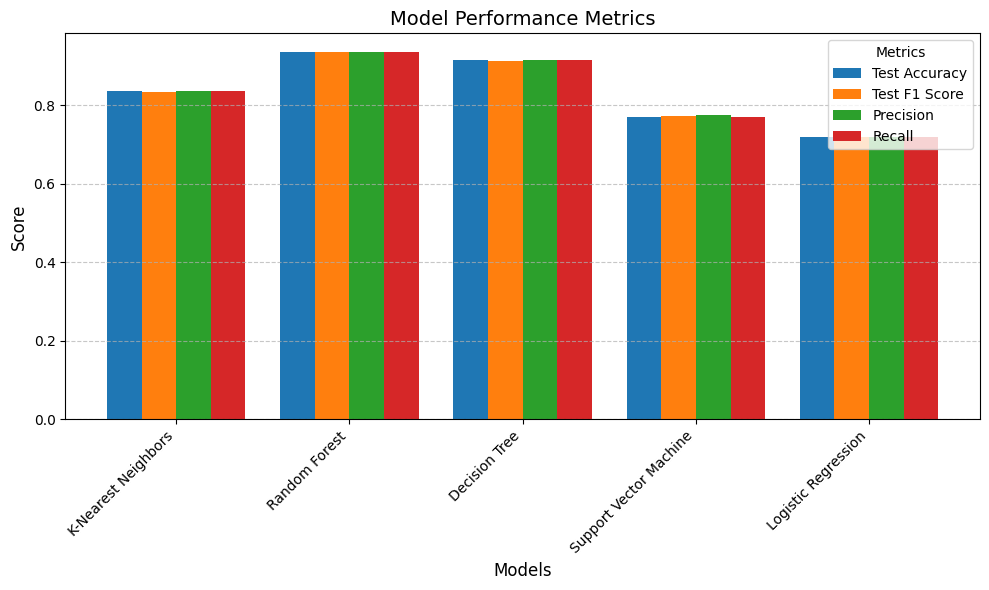

In [17]:
metrics = ["Test Accuracy", "Test F1 Score", "Precision", "Recall"]
model_names = results_df["Model"] # Changed 'models' to 'model_names'

metric_values = [results_df[metric] for metric in metrics]
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, metric_values[i], width, label=metric)

ax.set_xlabel('Models', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14)
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right') # changed 'models' to 'model_names'
ax.set_ylabel('Score', fontsize=12)
ax.legend(title="Metrics", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



---



---



#**What is Training accuracy/F1-Score and Testing Accurcy/F1-Score?**

*   **Training Accuracy/F1-Score :** Measures how well the model has learned from the training data.
*   **Test Accuracy/F1 Score :** Measures how well the model performs on unseen test data,  how well it generalizes to new data.

#**Why Do We Compare Training and Testing Metrics?**
1.   **Overfitting :**If the model has high train accuracy but low test accuracy, model might be overfitting to the Training data and not generalising well to unseen data.
2.   **Underfitting :** If the model has low train accuracy and low test accuracy, the model might be too simple to capture complexities in the data.

**If both Training and Testing metrics are relatively close to each other, model is most likely generalising well but Accuracy is still important metric on its own. If its not high enough, we cant say the model is performing well even if the training and testing metrics are close to each other**



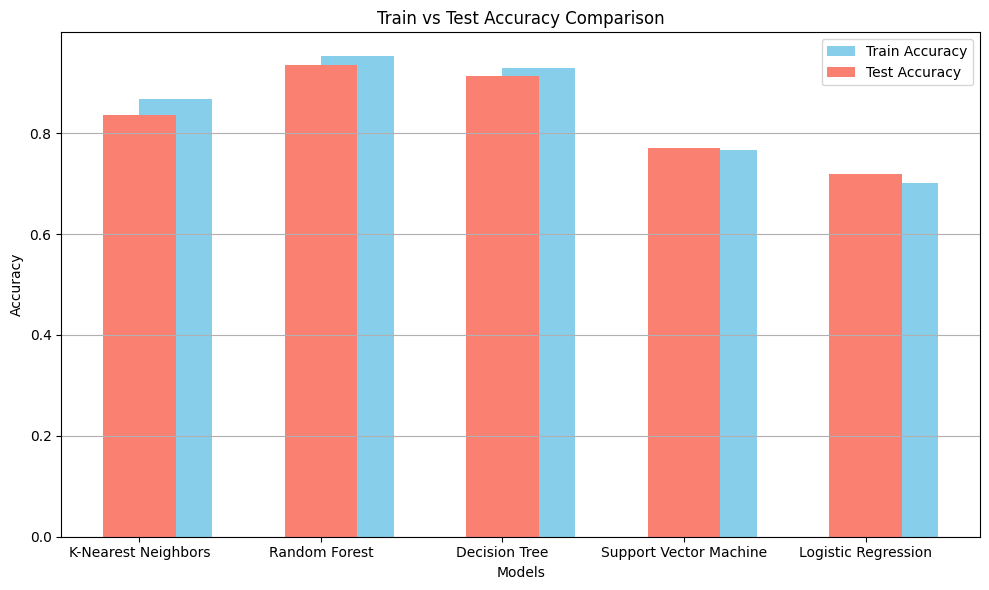

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(results_df["Model"], results_df["Train Accuracy"], width=0.4, label='Train Accuracy', align='edge', color='skyblue')
ax.bar(results_df["Model"], results_df["Test Accuracy"], width=0.4, label='Test Accuracy', align='center', color='salmon')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy Comparison')
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()



---



---



#**Here is the Confusion Matrices for the models that I used**





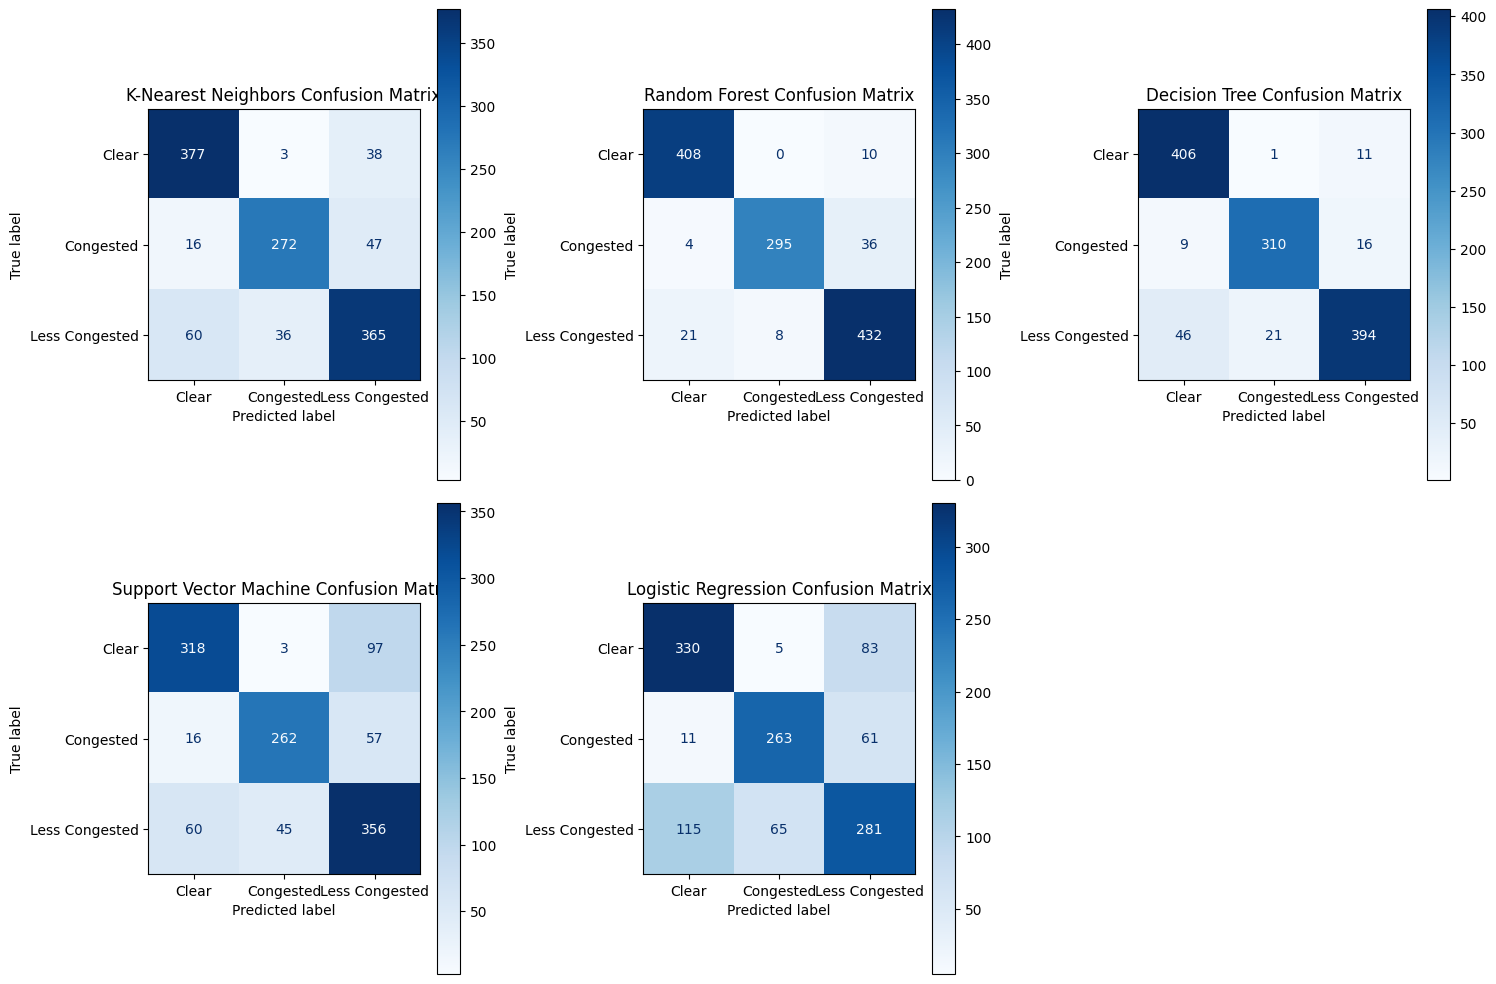

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(ax=axes[idx], cmap=plt.cm.Blues)
    axes[idx].set_title(f"{name} Confusion Matrix")

#Hide extra subplot axes if models are fewer than 6
for idx in range(len(models), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

There are signs of wrong predictions and confusion between clear and less congested labels.

This might be occuring because of how similar clear and less congested datas are in the dataset and less amount of examples of less congested data.



---



---



#**Cross Validation to Check how well the models generalise to different data partitions**

*  **Mean CV Accuracy :** This is the average performance (accuracy) across multiple folds of cross-validation. A higher value means that the model has good generalization performance across different subsets of the data.

*  **Std CV Accuracy :** This represents the variability of the accuracy across folds. A lower standard deviation indicates consistent performance, while a higher value shows the model's performance is inconsistent.


In [20]:
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = {
        "Mean CV Accuracy": np.mean(cv_scores),
        "Std CV Accuracy": np.std(cv_scores)
    }

cv_results_df = pd.DataFrame(cv_results).T
print("Cross-Validation Results :")
display(cv_results_df)

Cross-Validation Results :


,Mean CV Accuracy,Std CV Accuracy
K-Nearest Neighbors,0.831191,0.011048
Random Forest,0.925605,0.010299
Decision Tree,0.913249,0.005957
Support Vector Machine,0.765450,0.008093
Logistic Regression,0.707364,0.005349


#**Here is a graph to visulise and compare the results**

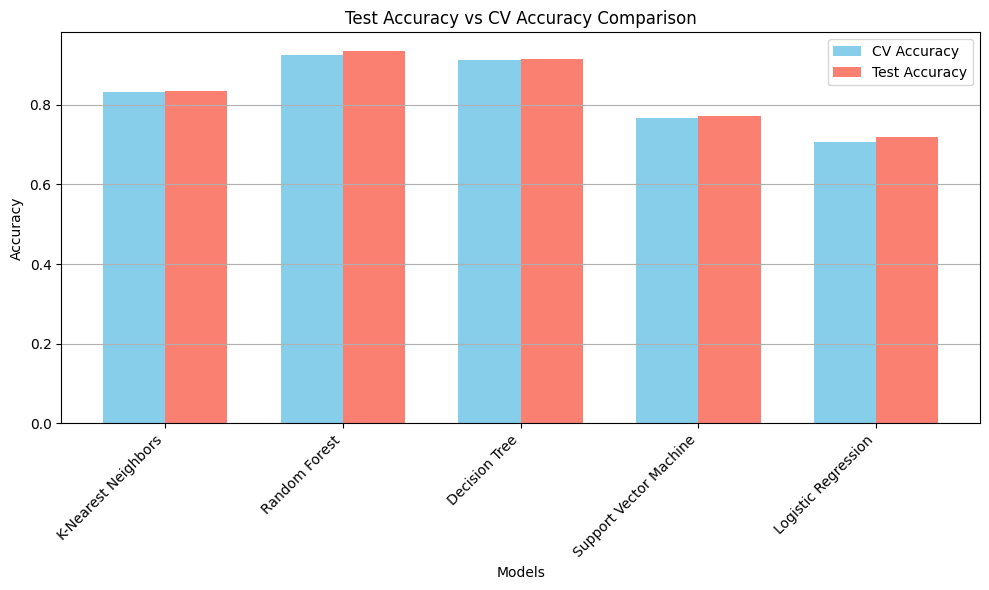

In [21]:
cv_accuracies = [cv_results[name]["Mean CV Accuracy"] for name in results_df["Model"]]
test_accuracies = results_df["Test Accuracy"]  # Test accuracies from the results
model_names = results_df["Model"]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

ax.bar(np.arange(len(model_names)) - width / 2, cv_accuracies, width=width, label='CV Accuracy', align='center', color='skyblue')
ax.bar(np.arange(len(model_names)) + width / 2, test_accuracies, width=width, label='Test Accuracy', align='center', color='salmon')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy vs CV Accuracy Comparison')
ax.set_xticks(np.arange(len(model_names)))
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

# What these results whow us?

Overall, all the models seem to generalise well for different data partitions.




---



---



# Conclusion

**We can say that overal best performer was Random forest.**

*   Accuracy and F1-score being the highest indicates that model has high performance
*   Cross validation and similarity between testing and training accuracies indicate that there wasn't any significant overfitting  
*   Training time is the 3rd lowest and its a tolerable value

**Random forest is the best suitable algorithm for Road traffic status prediction problem according to my testing, knowlege and judgement**